In [1]:
import pandas as pd
import os 
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
###########
#####note oncRNAs are tiled because a significant proprotion of RNAs are longer than the maximum length cutoff
##########

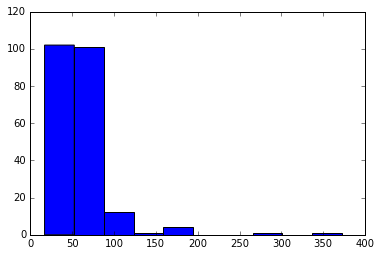

('before filter:', 222)
('after_filter:', 107)
('too long:', 115)
('this is the length of tiled seqs', 345)
('this is the length of total tiled and untiled seqs', 452)
('final length after filtering out cryptic RE sites', 434)


In [2]:
####define input file
infile_name = "oncRNAs.fa"
####define length cutoff
cutoff_len = 55
##################################

##################################
####read
infile = SeqIO.parse(infile_name,"fasta")
####get lengths
lengths = []
for record in infile:
    temp_len = len(record.seq)
    lengths.append(temp_len)
####plot log lengths
plt.hist(lengths)
plt.show()
####
print("before filter:", len(lengths))
###################################
####implement length cutoff
####read
infile = SeqIO.parse(infile_name,"fasta")
####index
record_dict = SeqIO.index(infile_name,"fasta")
###cutoff
filtered = []
filtered_long = []
for record in infile:
    if len(record.seq) < cutoff_len:
        filtered.append(record)
    else:
        filtered_long.append(record)
####
print("after_filter:",len(filtered))
print("too long:", len(filtered_long))
###################################
########tile those that are too long
def build_record(seq,seq_id):
    record = SeqRecord(seq,id=seq_id,description="")
    return(record)
tiled_long = []
for record in filtered_long:
    ###build tile1
    start = 0
    end = cutoff_len-1
    seq_id = record.id + "_tile1"
    seq = record.seq[start:end]
    tiled_long.append(build_record(seq,seq_id))
    ###build_tile2
    start = len(record.seq)-(cutoff_len-1)
    end = len(record.seq)
    seq_id = record.id + "_tile2"
    seq = record.seq[start:end]
    tiled_long.append(build_record(seq,seq_id))    
    ###build_tile3
    start = int(math.floor(start/2))
    end = start+(cutoff_len-1)
    seq_id = record.id + "_tile3"
    seq = record.seq[start:end]
    tiled_long.append(build_record(seq,seq_id))    
print("this is the length of tiled seqs",len(tiled_long))
###################################
########Concatenate lists
filtered = filtered + tiled_long
print("this is the length of total tiled and untiled seqs",len(filtered))
###################################

###################################
###############search for cryptic restriction sites in library
####define digest sites
digestF = "GAGACG"
digestR = "CGTCTC"
##################################

##################################
######filter for digestF site
filtered_2 = []
for record in filtered:
    if digestF in record.seq:
        temp = record
    else:
        filtered_2.append(record)
######filter for digestR site
filtered_3 = []
for record in filtered_2:
    if digestR in record.seq:
        temp = record
    else:
        filtered_3.append(record)
##################################reassign
filtered = filtered_3
print("final length after filtering out cryptic RE sites",len(filtered))

In [3]:
#######define negative control sequence file
negfile_name = "Negatives_shRNAscramble.txt"
##################################

##################################
####read and add to filtered
negfile = SeqIO.parse(negfile_name,"fasta")
for record in negfile:
    print(record)
    filtered.append(record)
####write out filtered to file
SeqIO.write(filtered, "filtered.fa", "fasta")

ID: SHC016
Name: SHC016
Description: SHC016
Number of features: 0
Seq('GCGCGATAGCGCTAATAATTT', SingleLetterAlphabet())
ID: SHC002
Name: SHC002
Description: SHC002
Number of features: 0
Seq('CAACAAGATGAAGAGCACCAA', SingleLetterAlphabet())


436

In [4]:
######define parameters for library construction
###
adapterF = "AGGATCTCTAGCCTCAAAccac"
adapterR = "gctgGATGAAGCATCGTAACTG"
adaptor_setID = "6"
###
digestLeft = "tcccaGAGACG"
digestRight = "CGTCTCaccga"
###
TuD_hairpin = "CAAGTATTCTGGTCACAGAATACAAC"
##################################

##################################
#######construct library
finalfile = SeqIO.parse("filtered.fa","fasta")
###
libfile = []
for record in finalfile:
    record.seq = adapterF + digestLeft + record.seq.reverse_complement() + TuD_hairpin + record.seq.reverse_complement() + digestRight + adapterR
    libfile.append(record)
    
#######write out library to file
libfile_name = "libfile_adaptorset_"+adaptor_setID+".fa"
SeqIO.write(libfile, libfile_name, "fasta")

436

In [5]:
####################check work
#############define index to examine
i = 0
##################################

##################################
print(libfile[i].seq)

print(filtered[i].seq)

AGGATCTCTAGCCTCAAAccactcccaGAGACGGGGAGAAGGCGCTCCCCCGGGGAGGAAGCCAAGTATTCTGGTCACAGAATACAACGGGAGAAGGCGCTCCCCCGGGGAGGAAGCCGTCTCaccgagctgGATGAAGCATCGTAACTG
GCTTCCTCCCCGGGGGAGCGCCTTCTCCC


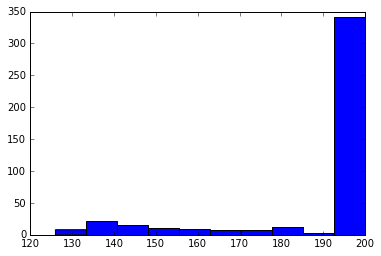

200


In [6]:
################check final lengths

####define input file
lib_name = "libfile_adaptorset_6.fa"
##################################

##################################
####read
infile = SeqIO.parse(lib_name,"fasta")
####get lengths
lengths = []
for record in infile:
    temp_len = len(record.seq)
    lengths.append(temp_len)
####plot log lengths
plt.hist(lengths)
plt.show()
####max length
print(max(lengths))